## Visualisation des données

In [1]:
import pandas as pd
pd.set_option("display.max.columns", 26)

In [2]:
df = pd.read_csv("../../data/US-pumpkins.csv")
df.shape

(1757, 26)

In [3]:
df.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,Mostly High,Origin,Origin District,Item Size,Color,Environment,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,280.0,MARYLAND,NaN,lge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,280.0,MARYLAND,NaN,lge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,160.0,DELAWARE,NaN,med,ORANGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,160.0,VIRGINIA,NaN,med,ORANGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,100.0,MARYLAND,NaN,lge,ORANGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [4]:
df.describe()

,Grade,Low Price,High Price,Mostly Low,Mostly High,Environment,Quality,Condition,Appearance,Storage,Crop,Trans Mode,Unnamed: 24
count,0.0,1757.000000,1757.000000,1654.000000,1654.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,124.571338,132.970939,128.170550,132.491802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,83.876591,89.524958,86.512161,88.442967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.240000,0.240000,0.240000,0.240000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,24.000000,24.500000,24.625000,26.125000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,140.000000,150.000000,147.000000,150.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,180.000000,200.000000,185.000000,200.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,480.000000,480.000000,480.000000,480.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.dtypes

City Name           object
Type                object
Package             object
Variety             object
Sub Variety         object
Grade              float64
Date                object
Low Price          float64
High Price         float64
Mostly Low         float64
Mostly High        float64
Origin              object
Origin District     object
Item Size           object
Color               object
Environment        float64
Unit of Sale        object
Quality            float64
Condition          float64
Appearance         float64
Storage            float64
Crop               float64
Repack              object
Trans Mode         float64
Unnamed: 24        float64
Unnamed: 25         object
dtype: object

In [6]:
df.isnull().sum()

City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64

In [7]:
columns_to_select = ["Package", "Low Price", "High Price", "Date"]
new_df = df.loc[:,columns_to_select]

On veut calculer le prix moyen d'une citrouille en fonction du mois afin de voir c'est quand le plus bas, on va faire la moyenne 
des prix et récuppérer le mois 

In [8]:
price = (new_df["Low Price"]+ new_df["High Price"])/2
month = pd.DatetimeIndex(new_df["Date"]).month
month

Index([ 4,  5,  9,  9, 11, 11,  9,  9, 10, 10,
       ...
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9],
      dtype='int32', name='Date', length=1757)

In [9]:
pumpkins = pd.DataFrame({"Month": month, "Package": df["Package"], "Low Price": df["Low Price"], "High Price": df["High Price"], "Price": price})
pumpkins

,Month,Package,Low Price,High Price,Price
0,4,24 inch bins,270.00,280.00,275.00
1,5,24 inch bins,270.00,280.00,275.00
2,9,24 inch bins,160.00,160.00,160.00
3,9,24 inch bins,160.00,160.00,160.00
4,11,24 inch bins,90.00,100.00,95.00
...,...,...,...,...,...
1752,9,22 lb cartons,14.75,14.75,14.75
1753,9,36 inch bins,275.00,275.00,275.00
1754,9,36 inch bins,275.00,275.00,275.00
1755,9,36 inch bins,275.00,275.00,275.00


Les citrouilles ont plein d'unités de mesures de packages différentes on va focus seulement sur les bishels

In [10]:
pumpkins = pumpkins[pumpkins["Package"].str.contains("bushel", case=True, regex=True)]
pumpkins

,Month,Package,Low Price,High Price,Price
70,9,1 1/9 bushel cartons,15.00,15.0,15.000
71,9,1 1/9 bushel cartons,18.00,18.0,18.000
72,10,1 1/9 bushel cartons,18.00,18.0,18.000
73,10,1 1/9 bushel cartons,17.00,17.0,17.000
74,10,1 1/9 bushel cartons,15.00,15.0,15.000
...,...,...,...,...,...
1738,9,1/2 bushel cartons,15.00,15.0,15.000
1739,9,1/2 bushel cartons,13.75,15.0,14.375
1740,9,1/2 bushel cartons,10.75,15.0,12.875
1741,9,1/2 bushel cartons,12.00,12.0,12.000


Il y'a 2 types de bushels différents on va uniformiser le prix pour un seul bushel

In [11]:
pumpkins.loc[pumpkins["Package"].str.contains("1/2"), "Price"] = price/(1/2)
pumpkins.loc[pumpkins["Package"].str.contains("1 1/9"), "Price"] = price/(1+ 1/9)
pumpkins

,Month,Package,Low Price,High Price,Price
70,9,1 1/9 bushel cartons,15.00,15.0,13.50
71,9,1 1/9 bushel cartons,18.00,18.0,16.20
72,10,1 1/9 bushel cartons,18.00,18.0,16.20
73,10,1 1/9 bushel cartons,17.00,17.0,15.30
74,10,1 1/9 bushel cartons,15.00,15.0,13.50
...,...,...,...,...,...
1738,9,1/2 bushel cartons,15.00,15.0,30.00
1739,9,1/2 bushel cartons,13.75,15.0,28.75
1740,9,1/2 bushel cartons,10.75,15.0,25.75
1741,9,1/2 bushel cartons,12.00,12.0,24.00


Visualisez les données

In [12]:
import matplotlib.pyplot as plt

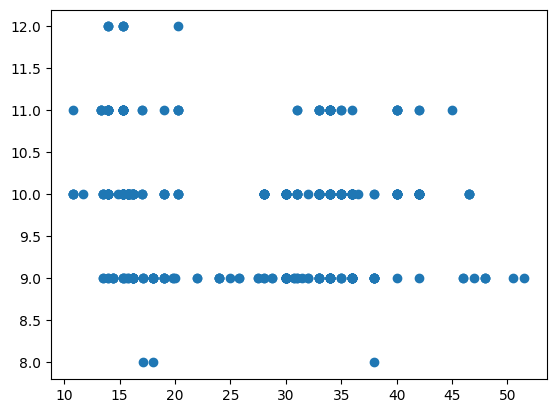

In [13]:
price = pumpkins.Price
month = pumpkins.Month
plt.scatter(price, month)
plt.show()

On voit pas grand chose d'interesser sur ce graphique, on va essayer de regrouper nos données pour les faire parler

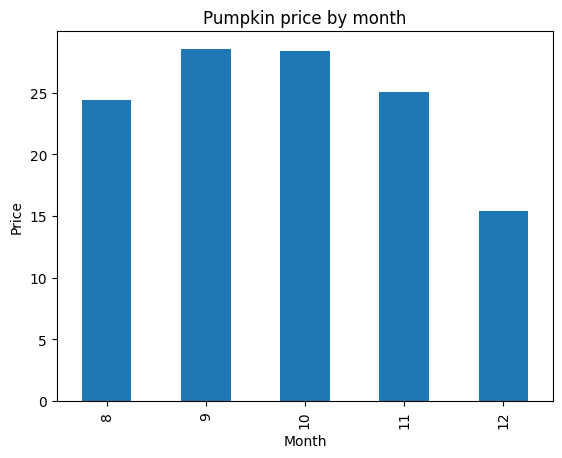

In [14]:
ax = pumpkins.groupby(["Month"])["Price"].mean().plot(kind="bar", title="Pumpkin price by month")
ax.set_xlabel("Month")
ax.set_ylabel("Price")
plt.show()

Le mois le moins cher pour acheter des citrouilles est donc en décembre

## Régression Linéaire

On va se servir de notre dataset complet car avant nous ne faisions nos visualisations que sur 400 citrouilles

In [15]:
from datetime import datetime
pumpkins = df[df['Package'].str.contains('bushel', case=True, regex=True)]

columns_to_select = ['Package', 'Variety', 'City Name', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.loc[:, columns_to_select]

price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2

month = pd.DatetimeIndex(pumpkins['Date']).month
day_of_year = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)

new_pumpkins = pd.DataFrame(
    {'Month': month, 
     'DayOfYear' : day_of_year, 
     'Variety': pumpkins['Variety'], 
     'City': pumpkins['City Name'], 
     'Package': pumpkins['Package'], 
     'Low Price': pumpkins['Low Price'],
     'High Price': pumpkins['High Price'], 
     'Price': price})

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/1.1
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price*2

new_pumpkins.head()


/tmp/ipykernel_110488/1605340919.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  day_of_year = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)


,Month,DayOfYear,Variety,City,Package,Low Price,High Price,Price
70,9,267,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,13.636364
71,9,267,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,16.363636
72,10,274,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,16.363636
73,10,274,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,17.0,17.0,15.454545
74,10,281,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,13.636364


On va essayer de voir s'il y'a des corrélations entre nos variables

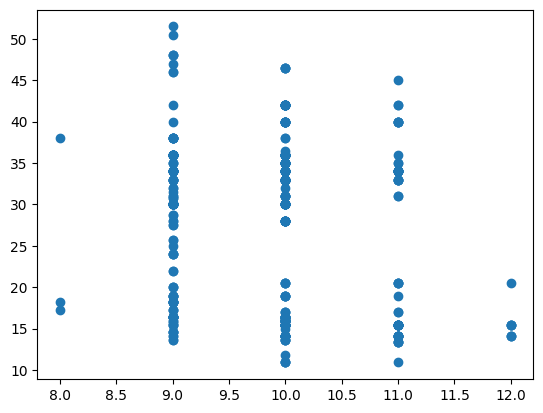

In [16]:
import matplotlib.pyplot as plt 
plt.scatter('Month', 'Price', data=new_pumpkins)
plt.show()

pas trop de corrélation

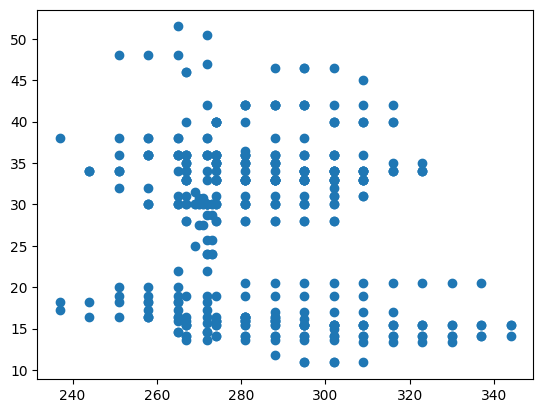

In [17]:
plt.scatter('DayOfYear', 'Price', data=new_pumpkins)
plt.show()

il ne semble pas y avoir de corrélation non plus, pour être sûr on va utiliser la fonction .corr()

In [18]:
print(new_pumpkins["Month"].corr(new_pumpkins["Price"]))
print(new_pumpkins["DayOfYear"].corr(new_pumpkins["Price"]))

-0.14878293554077526
-0.1667332249274541


Les corrélations sont proches de 0 donc il y a une très faible corrélation et si nous faisons des prédictions dessus ça ne sera pas très précis, cependant on observe sur le 2eme graphique nuage de points qu'il existe différents groupes de prix correspondant à différentes variétés de citrouilles. Pour confirmer cette hypothèse, traçons chaque catégorie de citrouilles en utilisant une couleur différente.En passant un paramètre ax à la fonction de tracé de nuage de points, nous pouvons tracer tous les points sur le même graphique :

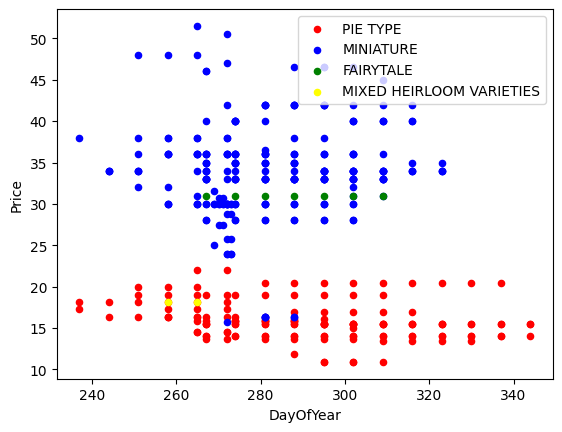

In [19]:
ax=None
colors = ['red','blue','green','yellow']
for i,var in enumerate(new_pumpkins['Variety'].unique()):
    df = new_pumpkins[new_pumpkins['Variety']==var]
    ax = df.plot.scatter('DayOfYear','Price',ax=ax,c=colors[i],label=var)

Les pie type semblent etre les moins chères

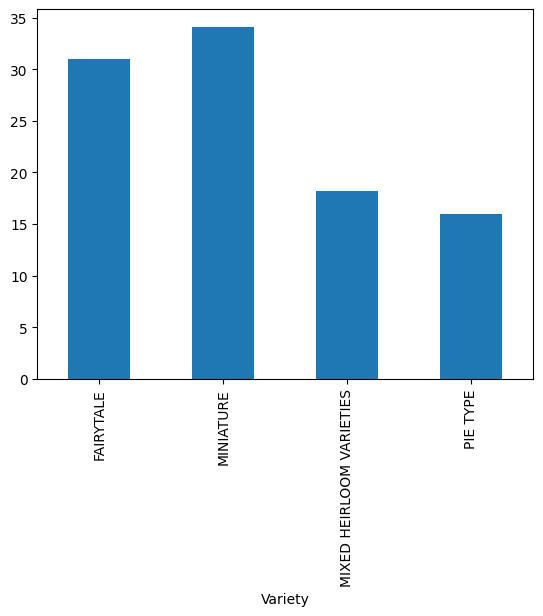

In [20]:
new_pumpkins.groupby('Variety')['Price'].mean().plot(kind='bar')
plt.show()

il semble donc que le type de citrouilles influent plus sur le prix que la période, on va se concentrer seulement sur le pie type

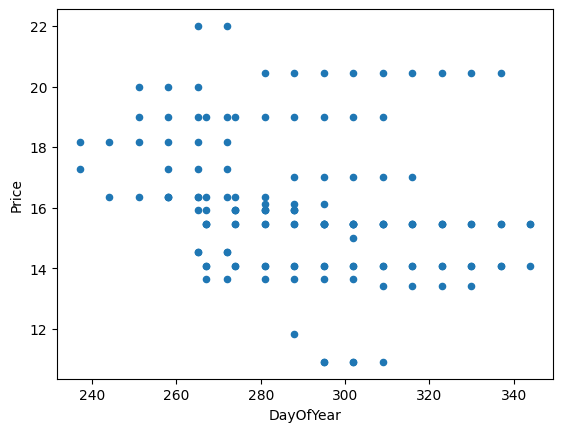

In [21]:
pie_pumpkins = new_pumpkins[new_pumpkins['Variety']=='PIE TYPE']
pie_pumpkins.plot.scatter('DayOfYear','Price') 
plt.show()

In [22]:
print(pie_pumpkins["DayOfYear"].corr(pie_pumpkins["Price"]))
print(pie_pumpkins["Month"].corr(pie_pumpkins["Price"]))

-0.2669192282197318
-0.23841413206125747


Les coefficients sont toujours bas mais un peu mieux que tout à l'heure, on va vérifier si ça vaut le coup de faire une régression lineaire

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

Objectif : Prédire le prix d'un pie type bushel en fonction du mois de l'année

On va faire 2 array pour nos données

In [24]:
X = pie_pumpkins["DayOfYear"]
y = pie_pumpkins["Price"]

X.shape

(144,)

Mais attention il va falloir les reshapes car on attend un 2d array, 
Les modèles s’attendent à ce que les données d’entrée soient en forme (n_samples, n_features)

n_samples = nombre d’exemples / lignes

n_features = nombre de variables / colonnes

Même si tu as une seule variable (ex. Speed_mph), scikit-learn veut une matrice 2D : (n_samples, 1) et non une simple série 1D.

Les X seront les données d'entrées et y les variables à prédire :

X → les données d’entrée (features, variables explicatives)

y → la cible ou valeur à prédire (variable dépendante)

In [25]:
X = pie_pumpkins["DayOfYear"].to_numpy().reshape(-1,1) ## ici on a un 2d array
y = pie_pumpkins["Price"] ## variable à prédire 

X.shape

(144, 1)

On split ensuite entre le train et le test :
Train dataset (entrainer notre modele de régression linéaire)
Test dataset (tester la qualité de nos résultats)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [27]:
## on crée l'objet linear regression
lin_reg = LinearRegression()

## Entrainement du modele on fit nos array
lin_reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


On va tester notre modele en utilisant nos données

In [28]:
pred = lin_reg.predict(X_test)
pred

array([16.21096253, 16.73652536, 16.08833121, 15.35254325, 15.96569988,
       16.73652536, 16.21096253, 16.36863138, 16.61389403, 15.84306855,
       15.84306855, 15.72043723, 16.21096253, 15.5978059 , 16.45622519,
       15.72043723, 15.5978059 , 16.08833121, 15.72043723, 16.36863138,
       16.85915669, 16.21096253, 15.22991192, 16.21096253, 15.84306855,
       16.45622519, 16.08833121, 15.84306855, 15.5978059 ])

Pour savoir si ces prédictions sont bonnes on va utiliser le mean square error

In [29]:
import numpy as np

mse = np.sqrt(mean_squared_error(y_test, pred))

print(f'Mean error: ({mse:3.3}) ({mse/np.mean(pred)*100:3.3}%)')

Mean error: (2.77) (17.2%)


C'est une grosse moyenne d'erreur donc nos prédictions ne seront pas précises

Un autre indicateur pour connaitre la qualité de notre modele est le coeeficient de determination (entre 0 et 1 et plus on est proche de 1 et plus notre modele fit nos données)

In [30]:
score = lin_reg.score(X_train, y_train)
print(f"Model determination : ", score)

Model determination :  0.04460606335028361


C'est très faible

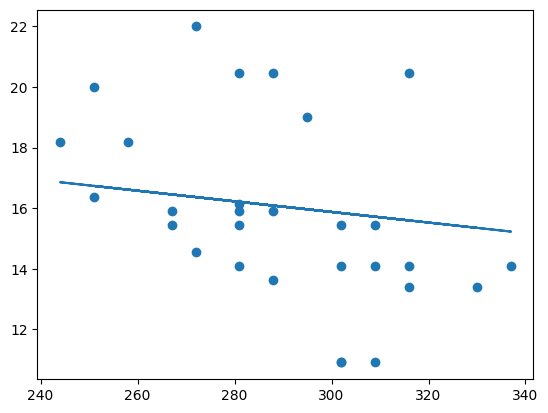

In [31]:
plt.scatter(X_test, y_test)
plt.plot(X_test, pred)
plt.show()

On va calculer l'équation de la droite y ax + b

In [32]:
print(f'y = {lin_reg.coef_[0]}x + {lin_reg.intercept_}')

y = -0.017518760953105x + 21.133734359909326


L'objet LinearRegression après l'ajustement contient tous les coefficients de la régression, qui peuvent être accessibles via la propriété .coef_. Dans notre cas, il n'y a qu'un seul coefficient, qui devrait être autour de -0.017. Cela signifie que les prix semblent baisser légèrement avec le temps, mais pas beaucoup, environ 2 centimes par jour. Nous pouvons également accéder au point d'intersection de la régression avec l'axe Y en utilisant lin_reg.intercept_ - il sera autour de 21 dans notre cas, indiquant le prix au début de l'année.

On peut utiliser notre modele pour prédire le prix 

In [33]:
lin_reg.predict([[256]]) ## on met [[]] pour avoir un 2d array

array([16.64893156])

Il faut garder à l'esprit que c'est pas très précis car notre mean squarred est pas terrible, on va surement avoir quelque chose de meilleure avec une régression polynomiale (courbe)

Mean error: (2.73) (17.0%)


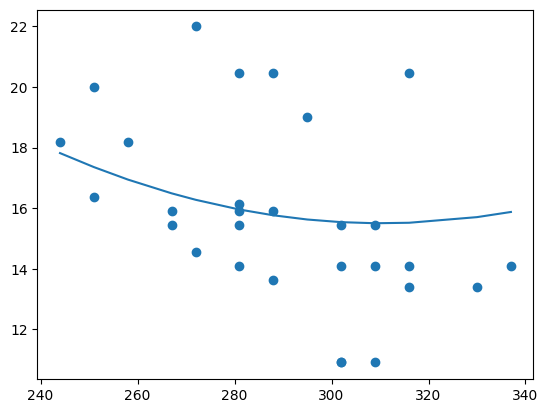

In [35]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

## Construction de la pipeline pour une regression polynomiale
pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())

pipeline.fit(X_train, y_train)

pred = pipeline.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test, pred))
print(f'Mean error: ({mse:3.3}) ({mse/np.mean(pred)*100:3.3}%)')

plt.scatter(X_test, y_test)
plt.plot(sorted(X_test),pipeline.predict(sorted(X_test)))
plt.show()



Ça fit un peu mieux que tout à l'heure mais pas top

Le mean square est de 2.73 c'est un peu mieux mais pas top

In [36]:
score = pipeline.score(X_train, y_train)
print(score)

0.07639977655280206


Un peu mieux mais toujours pas top 

Pistes pour améliorer ces valeurs : rajouter d'autres features/ données d'entrées,
Nous allons donc prendre en compte la variété des citrouilles dans notre modèle en plus du mois et du prix

Le type de données "variété" sont des object (str) dans pandas, il s'agit de variables catégorielle. Il va falloir les transformer en variables numériques. Pour ça on va utiliser get_dummies qui va créer des colonnes distinctes pour chaque variables catégorielle et leur associer un nombre. C'est la méthode one hot encoding

In [38]:
pd.get_dummies(new_pumpkins["Variety"], dtype=int)


,FAIRYTALE,MINIATURE,MIXED HEIRLOOM VARIETIES,PIE TYPE
70,0,0,0,1
71,0,0,0,1
72,0,0,0,1
73,0,0,0,1
74,0,0,0,1
...,...,...,...,...
1738,0,1,0,0
1739,0,1,0,0
1740,0,1,0,0
1741,0,1,0,0


In [39]:
X = pd.get_dummies(new_pumpkins["Variety"], dtype=int)

y = new_pumpkins["Price"]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

pred = lin_reg.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test, pred))
print(f'Mean error: ({mse:3.3}) ({mse/np.mean(pred)*100:3.3}%)')

score = lin_reg.score(X_train, y_train)
print(score)

Mean error: (5.24) (19.7%)
0.774085281105197


On obtient toujours pas de bons résultats mais c'est normal car on utilise un seul feature d'input on va donc en rajouter

In [42]:
X = pd.get_dummies(new_pumpkins["Variety"], dtype=int) \
    .join(pd.get_dummies(new_pumpkins["City"])) \
    .join(pd.get_dummies(new_pumpkins["Package"]))

y = new_pumpkins["Price"]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

pred = lin_reg.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test, pred))
print(f'Mean error: ({mse:3.3}) ({mse/np.mean(pred)*100:3.3}%)')

score = lin_reg.score(X_train, y_train)
print(score)

Mean error: (2.88) (10.7%)
0.9384517839133321


Les scores sont deja meilleurs mais on peut encore faire mieux essayons avec la regression polynomiale

In [48]:
pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())

pipeline.fit(X_train, y_train)

pred = pipeline.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test, pred))
print(f'Mean error: ({mse:3.3}) ({mse/np.mean(pred)*100:3.3}%)')

score = pipeline.score(X_train, y_train)
print(f'coefficient de determination :', score)


Mean error: (2.46) (9.09%)
coefficient de determination : 0.9570886197436239


Les scores sont vraiment meilleurs on peut utiliser ce modele 